In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ordpy import *

In [3]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
sns.set_style("white")
sns.set_style({"xtick.direction": "out",
            "ytick.direction": "out"})
rcparams = {'font.family': 'sans-serif',
       'font.sans-serif': ['Helvetica'],
       'axes.labelsize': 28,
       'axes.titlesize': 28,
       'legend.fontsize': 20,
       'ytick.right': 'off',
       'xtick.top': 'off',
       'ytick.left': 'on',
       'xtick.bottom': 'on',
       'xtick.labelsize': '25',
       'ytick.labelsize': '25',
       'axes.linewidth': 2.5,
       'xtick.major.width': 1.8,
       'xtick.minor.width': 1.8,
       'xtick.major.size': 14,
       'xtick.minor.size': 7,
       'xtick.major.pad': 10,
       'xtick.minor.pad': 10,
       'ytick.major.width': 1.8,
       'ytick.minor.width': 1.8,
       'ytick.major.size': 14,
       'ytick.minor.size': 7,
       'ytick.major.pad': 10,
       'ytick.minor.pad': 10,
       'axes.labelpad': 15,
       'axes.titlepad': 15,
       'axes.spines.right': False,
       'axes.spines.top': False,
       'figure.figsize': (9.1, 7.0),
       'lines.linewidth': 3
      }
mpl.rcParams.update(rcparams)

## Simple usage

In [130]:
import numpy as np
import ordpy
from matplotlib import pylab as plt

In [131]:
def logistic(a=4, n=100000, x0=0.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = a*x[i]*(1-x[i])
    return(x)

In [132]:
time_series = [logistic(a) for a in [3.05, 3.55, 4]]

In [133]:
time_series += [np.random.normal(size=100000)]

In [134]:
HC = [ordpy.complexity_entropy(series, dx=4) for series in time_series]

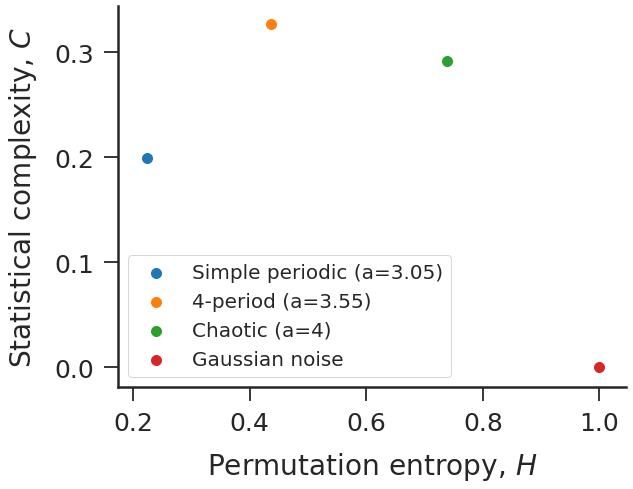

In [305]:
f, ax = plt.subplots(figsize=(9.1,7))

for HC_, label_ in zip(HC, ['Simple periodic (a=3.05)', 
                            '4-period (a=3.55)', 
                            'Chaotic (a=4)', 
                            'Gaussian noise']):
    ax.scatter(*HC_, label=label_, s=100)
    
ax.set_xlabel('Permutation entropy, $H$')
ax.set_ylabel('Statistical complexity, $C$')

plt.legend()
f.savefig('figs/sample_plane.png', bbox_inches='tight')

In [295]:
vertex_list, edge_list, edge_weight_list = list(), list(), list()

for series in time_series:
    v_, e_, w_ = ordpy.ordinal_network(series, dx=4)
    vertex_list += [v_]
    edge_list += [e_]
    edge_weight_list += [w_]

In [296]:
import igraph

In [297]:
def create_ig_graph(vertex_list, edge_list, edge_weight):
    
    G = igraph.Graph(directed=True)
    
    for v_ in vertex_list:
        G.add_vertex(v_)
    
    for [in_, out_], weight_ in zip(edge_list, edge_weight):
        G.add_edge(in_, out_, weight=weight_)
        
    return G

In [298]:
graphs = []

for v_, e_, w_ in zip(vertex_list, edge_list, edge_weight_list):
    graphs += [create_ig_graph(v_, e_, w_)]

In [299]:
def igplot(g):
    f = igraph.plot(g,
                    layout=g.layout_circle(),
                    bbox=(500,500),
                    margin=(40, 40, 40, 40),
                    vertex_label = [s.replace('|','') for s in g.vs['name']],
                    vertex_label_color='#202020',
                    vertex_color='#969696',
                    vertex_size=20,
                    vertex_font_size=6,
                    edge_width=(1 + 8*np.asarray(g.es['weight'])).tolist(),
                   )
    return f

Chaotic (a=4)


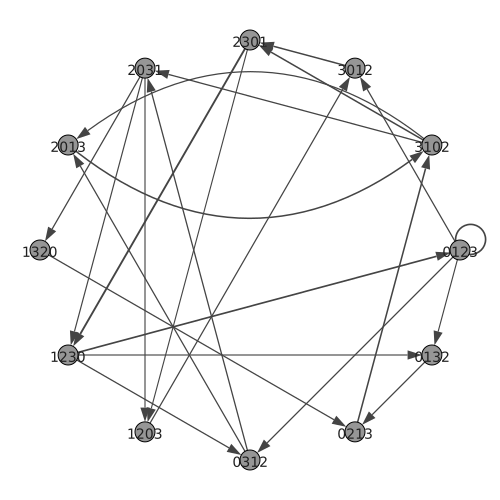

Gaussian noise


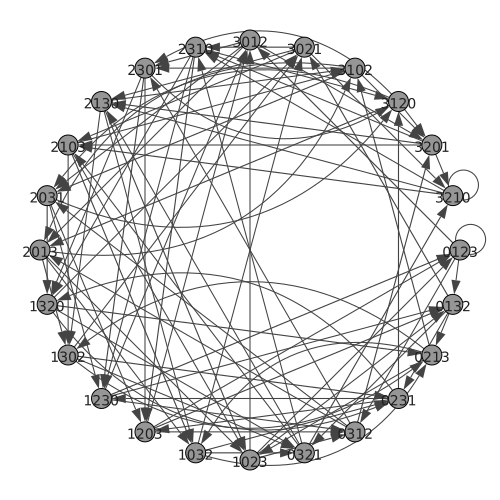

In [304]:
from IPython.core.display import display, SVG

for graph_, label_ in zip(graphs[2:], ['Chaotic (a=4)', 
                                       'Gaussian noise']):
    print(label_)
    display(SVG(igplot(graph_)._repr_svg_()),)
    

## Time series analysis

### permutation entropy of the logistic map 

In [76]:
def logistic(a=4, n=100000, x0=0.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = a*x[i]*(1-x[i])
    return(x)

In [77]:
H_logistic = []
a_list = np.linspace(3.5,4.,num=501)
for a in a_list:
    data = logistic(a)
    H_logistic += [permutation_entropy(data,dx=6)]

Text(0, 0.5, 'Normalized permutation entropy, $H$')

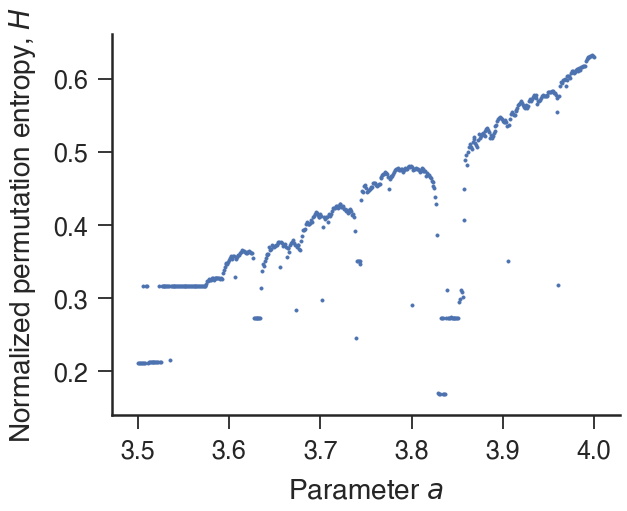

In [82]:
f, ax = plt.subplots()
ax.scatter(a_list, H_logistic, s=10)
ax.set_xlabel('Parameter $a$')
ax.set_ylabel('Normalized permutation entropy, $H$')